In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

spam_df = pd.read_csv('../Data science/Udemy_data/emails.csv')

In [2]:
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [4]:
spam_df.isna().sum()

text    0
spam    0
dtype: int64

In [5]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
ham = spam_df[spam_df['spam'] == 0]
spam = spam_df[spam_df['spam'] == 1]

In [7]:
print(f'Spam percentage: {(len(spam)/len(spam_df)) * 100} %')
print(f'ham percentage: {(len(ham)/len(spam_df)) * 100} %')

Spam percentage: 23.88268156424581 %
ham percentage: 76.11731843575419 %


<Axes: xlabel='spam', ylabel='count'>

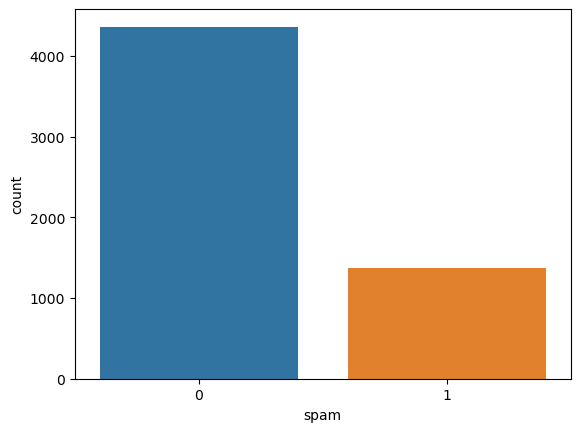

In [8]:
sns.countplot(spam_df, x='spam')

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
spam_ham_cntvect = vectorizer.fit_transform(spam_df['text'])

In [10]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [11]:
print(spam_ham_cntvect.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
spam_ham_cntvect.shape

(5728, 37303)

In [13]:
labels = spam_df['spam'].values
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# Dummy testing

In [14]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(spam_ham_cntvect, labels)

MultinomialNB()

In [15]:
testing_sample = ['Hello, I am Boo, I would like to book a hotel in Bali by January 24th',
                  'money vaiagra!!']

test_sample_vectorizer = vectorizer.transform(testing_sample)

test_pred = NB_classifier.predict(test_sample_vectorizer)
test_pred

array([0, 1], dtype=int64)

# Actual code

In [16]:
from sklearn.model_selection import train_test_split

x = spam_ham_cntvect
y = labels

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True)

In [17]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
y_predict = NB_classifier.predict(x_test)
y_predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

<Axes: >

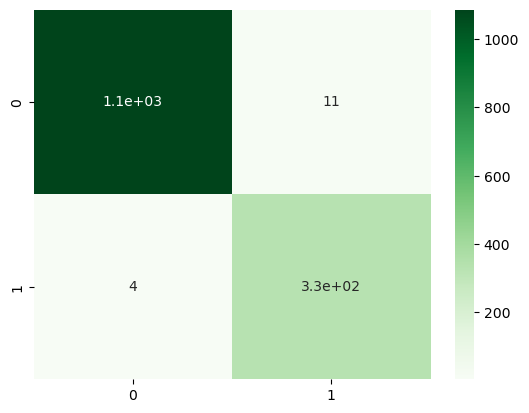

In [20]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap='Greens')

In [22]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1097
           1       0.97      0.99      0.98       335

    accuracy                           0.99      1432
   macro avg       0.98      0.99      0.99      1432
weighted avg       0.99      0.99      0.99      1432

